# MSA 2025 Phase 2 - Part 1

In [113]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

### Data set selcted: X store sales

In [114]:
# Data set selcted: X store sales
df = pd.read_csv('datasets/X store sales/store_sales.csv', encoding='latin1')  # ?containing special characters?

### - Load chosen datasets from the datasets folder into your notebook and display the first ten instances.

In [115]:
## Get first 10 rows from df
pd.set_option('display.max_columns', None)   # Set the display size
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# Print result
print(df.head(10))  # First 10 rows (instances)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID    Customer Name    Segment        Country             City         State  Postal Code   Region       Product ID   Category Sub-Category                                                      Product Name      Sales  Quantity  Discount     Profit
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson      Kentucky        42420    South  FUR-BO-10001798  Furniture    Bookcases                                 Bush Somerset Collection Bookcase   261.9600         2      0.00    41.9136
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson      Kentucky        42420    South  FUR-CH-10000454  Furniture       Chairs       Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back   731.9400         3      0.00   219.5820
2       4  US-2015-108966  10/1

Form first 10 instances there are 21 columns (variables) in this data set. 

### - Provide key statistical measures such as mean and standard deviation without hardcoding them.

In [116]:
# Summary
print(df.describe(include='number'))

            Row ID   Postal Code        Sales     Quantity     Discount       Profit
count  2121.000000   2121.000000  2121.000000  2121.000000  2121.000000  2121.000000
mean   5041.643564  55726.556341   349.834887     3.785007     0.173923     8.699327
std    2885.740258  32261.888225   503.179145     2.251620     0.181547   136.049246
min       1.000000   1040.000000     1.892000     1.000000     0.000000 -1862.312400
25%    2568.000000  22801.000000    47.040000     2.000000     0.000000   -12.849000
50%    5145.000000  60505.000000   182.220000     3.000000     0.200000     7.774800
75%    7534.000000  90032.000000   435.168000     5.000000     0.300000    33.726600
max    9991.000000  99301.000000  4416.174000    14.000000     0.700000  1013.127000


There are 6 numerical variables however ID and Postal Code are not meaningful for statistical measures. 

Sales: The average is 349.83, with a standard deviation of 503.18, indicating significant variation in sales figures.  
Quantity: The average is 3.79, with a standard deviation of 2.25, indicating that most orders involve purchasing 1 to 5 items.  
Discount: The average is 0.174, with a standard deviation of 0.18, indicating that most orders have relatively low discounts.
Profit: Average 8.70, standard deviation 136.05, indicating a dispersed profit distribution.

### - Visualize numerical columns through appropriate plots, e.g. bar plots, histograms, box and whisker plots, etc.

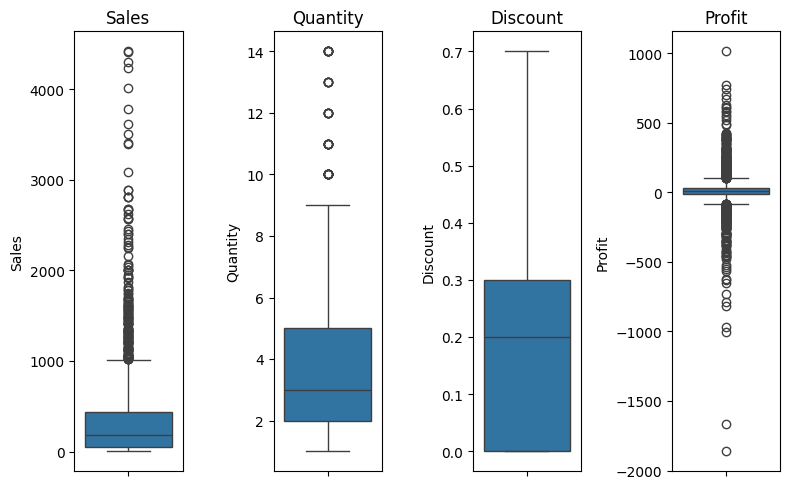

In [117]:
# Box plots
selected_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(8, 5))
for i, col in enumerate(selected_columns):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

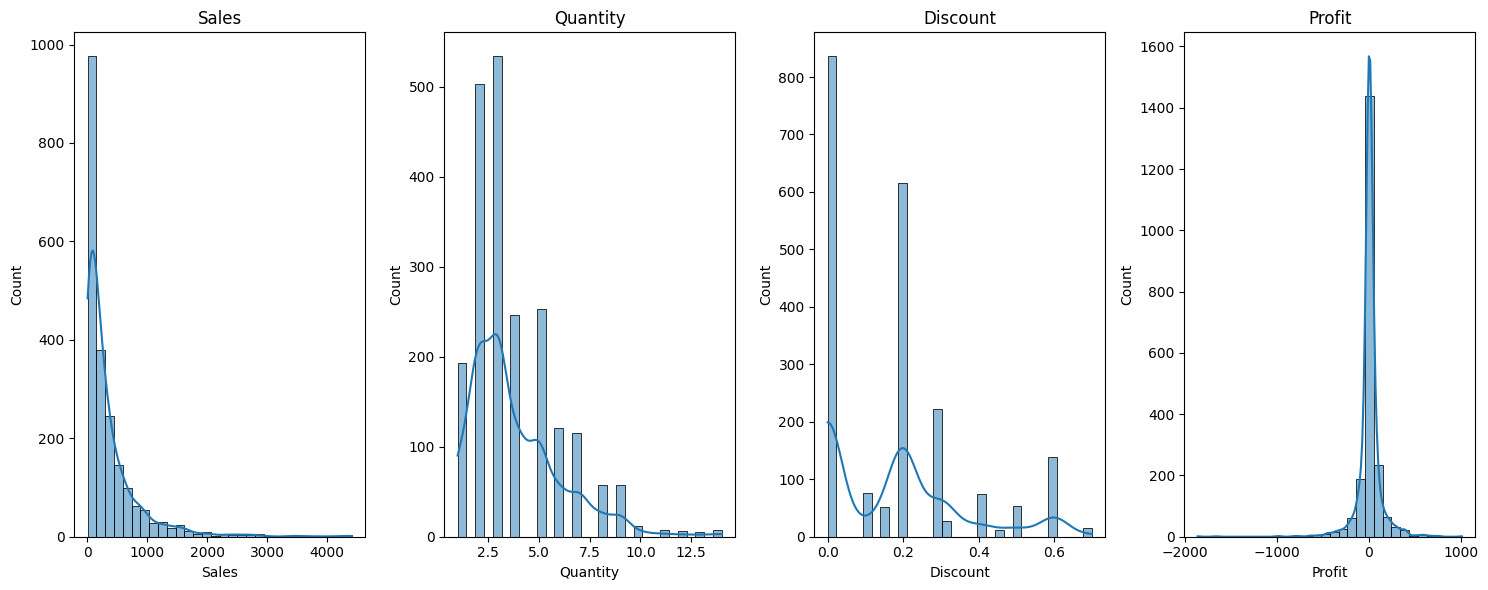

In [118]:
# Histogram
plt.figure(figsize=(15, 6))
for i, col in enumerate(selected_columns):
    plt.subplot(1, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

### - Convert data types of columns as needed, ensuring all values fed into machine learning models are numerical.

In [119]:
# Check data types for all varibales 
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [120]:
# Convert Row ID and  Postal Code to character
df[['Row ID', 'Postal Code']] = df[['Row ID', 'Postal Code']].astype(str)

# Check if convertion was successful
df[['Row ID', 'Postal Code']].dtypes

Row ID         object
Postal Code    object
dtype: object

In [121]:
# Convert Order Date and Ship Date to a pandas datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


# Check if convertion was successful
df[['Order Date', 'Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [122]:
# After Check
df.dtypes

Row ID                   object
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
# Replace Order Date & Ship Date with derived numeric features like year, month, day, etc.
df['order_year'] = df['Order Date'].dt.year.astype(int)
df['order_month'] = df['Order Date'].dt.month.astype(int)
df['order_day'] = df['Order Date'].dt.day.astype(int)
df['order_weekday'] = df['Order Date'].dt.weekday.astype(int)
df['order_is_weekend'] = (df['order_weekday'] >= 5).astype(int)
df['order_quarter'] = df['Order Date'].dt.quarter.astype(int)

df['ship_year'] = df['Ship Date'].dt.year.astype(int)
df['ship_month'] = df['Ship Date'].dt.month.astype(int)
df['ship_day'] = df['Ship Date'].dt.day.astype(int)
df['ship_weekday'] = df['Ship Date'].dt.weekday.astype(int)
df['ship_is_weekend'] = (df['Ship Date'].dt.weekday >= 5).astype(int)
df['ship_quarter'] = df['Ship Date'].dt.quarter.astype(int)

In [124]:
# Check how many categories in each column
df.nunique()

Row ID              2121
Order ID            1764
Order Date           889
Ship Date            960
Ship Mode              4
Customer ID          707
Customer Name        707
Segment                3
Country                1
City                 371
State                 48
Postal Code          454
Region                 4
Product ID           375
Category               1
Sub-Category           4
Product Name         380
Sales               1636
Quantity              14
Discount              11
Profit              1777
order_year             4
order_month           12
order_day             31
order_weekday          7
order_is_weekend       2
order_quarter          4
ship_year              5
ship_month            12
ship_day              31
ship_weekday           7
ship_is_weekend        2
ship_quarter           4
dtype: int64

In [125]:
print(df.head(5))

  Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID    Customer Name   Segment        Country             City       State Postal Code Region       Product ID   Category Sub-Category                                                      Product Name      Sales  Quantity  Discount    Profit  order_year  order_month  order_day  order_weekday  order_is_weekend  order_quarter  ship_year  ship_month  ship_day  ship_weekday  ship_is_weekend  ship_quarter
0      1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520      Claire Gute  Consumer  United States        Henderson    Kentucky       42420  South  FUR-BO-10001798  Furniture    Bookcases                                 Bush Somerset Collection Bookcase   261.9600         2      0.00   41.9136        2016           11          8              1                 0              4       2016          11        11             4                0             4
1      2  CA-2016-152156 2016-11-08 2016-11-11    

In [ ]:
# One-hot-coding
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df_onehot = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Drop non-numberical columns Order Date & Ship date
df_onehot.drop(columns=['Order Date', 'Ship Date'], inplace=True)

print(df_onehot.head(5))

       Sales  Quantity  Discount    Profit  order_year  order_month  order_day  order_weekday  order_is_weekend  order_quarter  ship_year  ship_month  ship_day  ship_weekday  ship_is_weekend  ship_quarter  Row ID_1  Row ID_1000  Row ID_1003  Row ID_1011  Row ID_1012  Row ID_1014  Row ID_1017  Row ID_1018  Row ID_1022  Row ID_1031  Row ID_1032  Row ID_1037  Row ID_1041  Row ID_1043  Row ID_1046  Row ID_1048  Row ID_105  Row ID_1051  Row ID_1053  Row ID_1055  Row ID_1061  Row ID_1068  Row ID_1082  Row ID_1083  Row ID_1090  Row ID_1098  Row ID_11  Row ID_1100  Row ID_1107  Row ID_111  Row ID_1115  Row ID_1124  Row ID_1127  Row ID_1130  Row ID_1142  Row ID_1152  Row ID_1156  Row ID_1158  Row ID_1159  Row ID_1168  Row ID_1178  Row ID_118  Row ID_1191  Row ID_1195  Row ID_1197  Row ID_1199  Row ID_120  Row ID_1201  Row ID_1203  Row ID_1212  Row ID_1213  Row ID_1218  Row ID_1223  Row ID_1230  Row ID_1235  Row ID_1237  Row ID_1238  Row ID_1239  Row ID_1246  Row ID_1247  Row ID_1248  \
0   261.

Now every column is numeric.

## 2. Visualise data

In [ ]:
#


  Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID    Customer Name   Segment        Country             City       State Postal Code Region       Product ID   Category Sub-Category                                                      Product Name      Sales  Quantity  Discount    Profit  order_year  order_month  order_day  order_weekday  order_is_weekend  order_quarter  ship_year  ship_month  ship_day  ship_weekday  ship_is_weekend  ship_quarter
0      1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520      Claire Gute  Consumer  United States        Henderson    Kentucky       42420  South  FUR-BO-10001798  Furniture    Bookcases                                 Bush Somerset Collection Bookcase   261.9600         2      0.00   41.9136        2016           11          8              1                 0              4       2016          11        11             4                0             4
1      2  CA-2016-152156 2016-11-08 2016-11-11    

## 3. Clean data

In [128]:
#

## 4. Identify correlated variables

In [129]:
#

## 5. Summary